# Feature generation
Feature generation also known as feature engineering  is a procedure that, as everything in predictive ML, aims at improvement of predictive performance of our models. Feature selection is very strongly connected to feature selection as it is necessary to properly evaluate newly created features.

## Why feature engineering?
The goal is predictive performance. However depending on the charachteristics of the dataset (like ratio of number of observations to the number of features) and the ML models we use it can be achieved in vaious ways.  When we use models that are fairly rigid and do not tend to overfit (like linear regression based models) we may get the best results by addition of new features that will help capture non linear relationships. On the other hand for models that are highly elastic, like decision trees and neural netowkrs, can actually be improved by reduction of the number of features or simplification.

## How to engineer features?
In the real world ML process starts with the ETL process ETL (Extract-Transform-Load, https://en.wikipedia.org/wiki/Extract,_transform,_load).
* Extract - extraction of "raw" data from multiple sources, mainly but not only databases. Sometimes we extract data from, text or even audio files.
* Transform - transformation of "raw" data into other formats that we can later on use in modelling. 
* Load - writing our dataset into a "file" that can be easily accessed in the development of our models.

The freature generation process takes place mainly during Transform phase, but it is also present during Extraction and after the ETL process is done.

In the first phase, Extract, we should look for all data sources that can possiby hold any valuable information about our target variable that we can later on , transform into useful features. At the stage expert domain knowledge is very helpful as it can save a lot of time and help us make sure that we will not miss any valuable data.

For example when a bank wants to predict behavior of its clients it can look into following data sources:
* Data from points of contact (the way client uses WWW interface, telephone line, mobile app etc.)
* Data from various products (account, credit cards, credits, savings etc.)
* Data from other related services (insurance, investment)
* Data from other subjects (information about our employer, family members, etc.)
* ...

Not all the data is always available. In practice we need to take legal restriction into account. However we do not need to dive into this problem at this stage.

In the seconnd phase, Transform, the feature generation is a typical analytical engineering. Getting back to our banking example. Lets say we want to analyze ones credit score. In this situation one person is our one observation. At the same time we have a lot of data, tables and vectors, for just one person. We will also have both corss section data and time series data for just one person. We need to aggragate and transform all the data to get just one vector per person. Again, the number of ways to do it is almost infinite. To imagine the multitude of options 
* mean/median numer of transactions per month
* ratio of credit to debit  transactions
* mean/median value of transaction per month/week
* quantile, maximum values of transactions per month/week
* stability and standard deviations
* variation of invome and expenditures per month/week
* ...

Generaly speaking:
* For tabular data we will aggregate data, descrbie data statisticaly, deaggregate, smooth, simplify, interpolate and so on.
* For text data we will need to tokenize, stemm the date, reduce the number of dimmensions and descrbie the text statistically.
* For audio and image data we usaually will need to simplify the data and compress the image in some way or generate features using unsupervised learning methods.

There are many, many possibilities. Every problem is different with its own charachteristics. To make it even harder it is almost impossible to automate the feature generation process. Therefore it is usually time consuming at all stages. All those factors contribute to people calling feature engineering an art, especially as expert knowledge (in both ML and problem specific domain) and experience is invaluable. Whats more feature generation is superbly important as it is fundamental to high predictive performance. More soe than proper handling and tuning of ML algorithms.

### Feature engineering post ETL
When the ETL process is done it does not mean that feature generation is no longer possible. There are many ways in which the data set can be modyfied in order to imporeve performance of our model. Three general types are:
* Transformation
* Feature creation
* Simplification
All the methods described below can be applied to independent variables but also to a dependant variable in regression problems.

#### Transformation
There are many ways to transform the data in such a way that the amount of information (resolution) is not decreased. Feature transformation is most useful for methods based on linear regression and all other algorithms that are sensitive to data dstributions (SVM, k-NN etc.). Usually we try to either to transform the data to capture a non-linear relationship with a linear model or change its distribution so it is more sutable to the algorithm used.

Lets look at an example. Imagine that there is a relationship between x and y in a binary classification problem, that the probability of y=1 increases on average with x. If x has a heavily skewed distribution it is probable that the distance in x dimension between observations will not corellate linearly with probability of y=1.
<img src="img/skewPos.png">

In such situation transforming x using centiles (ranks) can help a lot with abovementioned algorithms.

We have seen other methods of transformation in previous lessons in section about standarization/normalization.
* Simple normalization: $z = {x- \mu \over \sigma}$
* Transformation to a [0,1] distribution: $X\_new = \frac{X - min(X)}{max(X) - min(X)}$.
* Transformation to a uniform [0,1] distribution using quantiles (ranks).
* Transformation to a normal distribution using quantiles (ranks). A quantile transformation can be used to transform a feature to any distribution with a well defined cumulative distribution function. It is also known as Rank-Based Inverse (Normal) Transformations.
* Transformation to a normal distribution using Box-Cox transformation. Although quantile transformation is simple and helpful one may consider it too "elastic" as it distorts the distribution very heavily. In this case using a more parametric transformation may be a better way. In Box-Cox transformation we test a range of $\lambda$ values, usually from -5 to 5 and see for which value a transformed distribution is most similar to normal distribution.
$$ y_i^{(\lambda)} =
\begin{cases}
\dfrac{y_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
\ln{(y_i)} & \text{if } \lambda = 0,
\end{cases} $$



#### Creating new features
In some cases we will want to creat additional features based on the existing ones. Interaction between variables is the foremost used way in feature creation. Most if not all ML algorithms are sensitive to the problem of interactions. In some cases our model cannot take interactions between variables without additional help (linear regression) in other cases it may depend on the type of interaction (SVM, k-NN) and in other the model may "find the interaction on its own" but need a lot of observations to do it (decision trees).

The number of possible interactions is infinite. Usually we start with with simple multiplication or division, as it can help a lot in case of linear regression. For other algorithms even substraction and addition can be helpful. 
Other useful options to include are:
* $x-y$, $x-|y|$
* $|x|y$, $|x| |y|$
* $\frac{x^2}{y}$, $\frac{x^2}{y^2}$ 
* $x^2\sqrt{|y|}$
* ...
It is clear that there are too many possibilities to try them all. Feature generation is a time consuming process that cannot be automated and relays heavily on the expert knowledge. Furthermore in many cases there is a multitude of features one needs to test. When the number of features is small, and the predictive power is valuable it is best to visually and statistically inspect all possible interactions. On the other hand when there are too many features to test the interactions by hand feature selection techniques are the only way to go.

Other, frequently used, technique for adding new features is time-series decomposition. In this case splitting a variable (tsrget or dependant) into trend, seasonality and time-independant values can improve predictive power a lot.

<img src="img/timeSeriesDecomp.png" width="50%">
Źródło: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/


#### Simplification
In many cases, especially when we use algorithms that tend to overfit like boosted decision trees or neural networks, we can make our model better by simplification of features. It can greatly reduce the overfitting problem in some cases and make fitting easier in other.
* Grouping of binary variables. In many cases when we work with a nominal unordered variable it can happen that we will get a lot of variable in binarization process (for instance with large number of countries/cities/states). It may very easily lead to over fitting even with models based on linear regression. In such problems it is a good idea to group some of the dummies together. It can be done based on geographical location or any other charachteristic (urbanization, average GDP, etc.) or by the relationship with dependant variable.
* Sometimes, especially when we have few observations or we work with an algorithm that can overfit very easily it may be a good idea to simplify/reduce resolution of a feature. It can be done simply by rounding or binning /discretization. A variable that is most commonly simplified is age. usually it is treated as a continous variable. However the relationship between age and other variables is usually nonlinear. In this case discretization can help with both overfitting and nonlinear modelling. Binning can be done using some expert knowledge (for instance about typical age for different education levels and retirement) or by optimal binning based on feature selection methods. We can simply calculate mutual information for multiple possible binnings and chose the best one. This technique can also often lead to inference.
* Replacement/reduction. When two or more features are correlated or connected with each other in some other way it may be helpful to replace them with just one variable that. This variable can be created using PCA or through predictive modelling (this will lead to a simple form of stacking). Replacement/reduction can also be done using other unsupervised learning methods like k-NN or any other clustering method.


## Feature engineering in ML cycle
We usually repeat the process of feature generation in the ML cycle, where avter development, and deployment of our model it is time to evaluation that leads back to the development.
<img src="img/MLcycle.png" width="35%">
Source: Quora

We can describe feature generation cycle in the following steps:
* Brainstorimng. Coming up with ideas about possible data sources and features. At this stage we are trying to maximize number of features.
* Feature generation. Preparation of our dataset in the ETL process.
* Feature selection and evaluation.
* Evaluation of the model.

### Examples
As every problem is different the best steps to take may vary. Below are links to some interesting examples of ML and feature engineering:
* https://www.kaggle.com/harryem/feature-engineering-on-the-titanic-for-0-81339
* http://pslcdatashop.org/KDDCup/workshop/papers/kdd2010ntu.pdf
* https://kaggle2.blob.core.windows.net/wiki-files/327/e4cd1d25-eca9-49ca-9593-b254a773fe03/Market%20Makers%20-%20Milestone%201%20Description%20V2%201.pdf


## Feature generation in practice
Lets start with our medical data set and load.

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

import gc
medical = pd.read_csv("data/medical_care.csv")
print(medical.shape)
pd.set_option("display.max_columns",50)
medical.head()
medical["UCURNINS"] = (medical.UCURNINS=="Yes").astype(int)

(35072, 29)


As a reminder lets see the result of cross validation in our big logistic model. Decent results, no overfitting problems. Due to the stability of we will use simple cross validation as it also allows us to use flexible stratification.

### Optimal binning
Lets start with optimal binning problem of age in our medical data set with logistic regression. When we try to look at the data it seems that it mitgh be possible to get some value ot of it as the relationship seems non linear as both the youngest and oldest people in our sample seem to be more often uninsured.

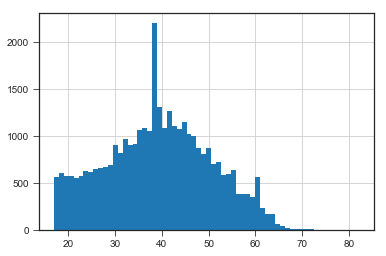

In [2]:
medical.UAGE.hist(bins=medical.UAGE.nunique())

We can see that there are very little observations with age greater than 65. We can group them so it is easier for us to test large range of bins later on.

In [3]:
medical.loc[medical.UAGE>65, "UAGE"]=65

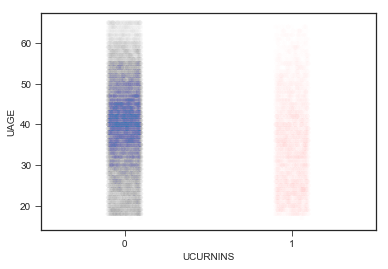

In [4]:
import seaborn as sns
sns.stripplot(x="UCURNINS", y="UAGE", data=medical, jitter=True, alpha =0.005)

### Benchmark and procedure
No binning for reference (benchmark). We are using constant seed for some comparability between configurations. To be able to see some results we need to decrease the number of variables as some of them are correlated with age. Additionally we will also make our training sample fairly small to make the differences more extreme.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(medical, medical.UCURNINS, stratify=medical.UAGE, test_size=0.7, random_state=2018)
print(X_train.shape, X_test.shape)
mod = sm.GLM.from_formula(formula="UCURNINS ~ UMARSTAT +  U_HRSLY  + GENDER +" \
                          "UAGE", data=X_train, family=sm.families.Binomial())
res = mod.fit()
predsTrain = res.predict()
preds = res.predict(X_test)
print("Train AUC:", roc_auc_score(y_train, predsTrain), "Valid AUC:", roc_auc_score(y_test, preds))

(10521, 29) (24551, 29)
Train AUC: 0.6808034101211586 Valid AUC: 0.678374656367757


"Full binning". Every "year" a different level. This is most certainly too much. However it will serve as an example to show that it is possible to overfit even with logistic regression.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(medical, medical.UCURNINS, stratify=medical.UAGE, test_size=0.7, random_state=2018)
print(X_train.shape, X_test.shape)
mod = sm.GLM.from_formula(formula="UCURNINS ~ UMARSTAT +  U_HRSLY  + GENDER +" \
                          "C(UAGE)", data=X_train, family=sm.families.Binomial())
## We treat 'age' as a categorical variable
res = mod.fit()
predsTrain = res.predict()
preds = res.predict(X_test)
print("Train AUC:", roc_auc_score(y_train, predsTrain), "Valid AUC:", roc_auc_score(y_test, preds))

(10521, 29) (24551, 29)
Train AUC: 0.6933794045627082 Valid AUC: 0.6731027678319991


In [13]:
#res.summary()

# As you can - seperate variables for all ages
# We can see for values [59,64] - similar coeficient
# For 65 smaller coeficient
# Spike in 58 - fairly interesting
# Interesting group 54-58
# So we can see - some kind of grouping by coef depending on age
# We can see 65 is fine boundry

Nothing very serious yet but it seems that here we have finally managed to overfit linear regression (we may see different results for different seeds). Lets try some simple, less extreme binning. Division module by 6 should give us around 10 bins.

In [14]:
medical["UAGE2"]=medical["UAGE"]//5

In [15]:
X_train, X_test, y_train, y_test = train_test_split(medical, medical.UCURNINS, stratify=medical.UAGE, test_size=0.7, random_state=2018)
print(X_train.shape, X_test.shape)
mod = sm.GLM.from_formula(formula="UCURNINS ~ UMARSTAT +  U_HRSLY  + GENDER +" \
                          "C(UAGE2)", data=X_train, family=sm.families.Binomial())
res = mod.fit()
predsTrain = res.predict()
preds = res.predict(X_test)
print("Train AUC:", roc_auc_score(y_train, predsTrain), "Valid AUC:", roc_auc_score(y_test, preds))

# When we divide age by 5, basically the same as starting point (AUC)

(10521, 30) (24551, 30)
Train AUC: 0.6880408660452987 Valid AUC: 0.6788443832052674


This is a slight improvement over our frst results. Nothing significant but we have slightly higher value for validation set with lower value for training set at the same time. Maybe we can come up with better grouping of bins by looking at the estimates for all age levels on full set. 
It seems that we may get good results with following bins:
* < 22
* 23-26
* 27-36
* 37 - 60
* 61 - 63
* 64 +

In [9]:
mod = sm.GLM.from_formula(formula="UCURNINS ~ UMARSTAT +  U_HRSLY  + GENDER +" \
                          "C(UAGE)", data=medical, family=sm.families.Binomial())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               UCURNINS   No. Observations:                35072
Model:                            GLM   Df Residuals:                    35014
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -13515.
Date:                Tue, 17 Apr 2018   Deviance:                       27029.
Time:                        19:30:23   Pearson chi2:                 3.47e+04
No. Iterations:                    24                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.4174      0.594      0.703      0.482      -0.746       1.581
UMARSTAT[T.Married, do not live together]     0.5955      0.137      4.332      0.000       0.326       0.865
UMARSTAT[T.Married_live together]            -0.9028      0.049    -18.247      0.000      -1.000      -0.806
UMARSTAT[T.Never married]                    -0.2206      0.059     -3.713      0.000      -0.337      -0.104
UMARSTAT[T.Partnership]                       0.4787      0.075      6.349      0.000       0.331       0.626
UMARSTAT[T.Separated]                         0.3251      0.085      3.823      0.000       0.158       0.492
UMARSTAT[T.Unknown]                           0.5013      0.332      1.511      0.131      -0.149       1.151
UMARSTAT[T.Widowed]                           0.0406      0.130      0.312      0.755      -0.215       0.296
GENDER[T.Male]                                0.4536      0.034     13.264      0.000       0.387       0.521
C(UAGE)[T.18]                                -1.6424      0.600     -2.739      0.006      -2.818      -0.467
C(UAGE)[T.19]                                -1.2564      0.597     -2.105      0.035      -2.426      -0.086
C(UAGE)[T.20]                                -1.0739      0.597     -1.799      0.072      -2.244       0.096
C(UAGE)[T.21]                                -1.2265      0.597     -2.053      0.040      -2.397      -0.055
C(UAGE)[T.22]                                -0.9539      0.597     -1.598      0.110      -2.124       0.216
C(UAGE)[T.23]                                -0.7862      0.597     -1.318      0.188      -1.955       0.383
C(UAGE)[T.24]                                -0.8369      0.596     -1.404      0.160      -2.006       0.332
C(UAGE)[T.25]                                -0.8504      0.597     -1.425      0.154      -2.020       0.319
C(UAGE)[T.26]                                -0.9334      0.597     -1.564      0.118      -2.103       0.236
C(UAGE)[T.27]                                -1.1264      0.598     -1.885      0.059      -2.298       0.045
C(UAGE)[T.28]                                -1.0700      0.597     -1.791      0.073      -2.241       0.101
C(UAGE)[T.29]                                -1.2176      0.598     -2.035      0.042      -2.390      -0.045
C(UAGE)[T.30]                                -1.2316      0.596     -2.065      0.039      -2.400      -0.063
C(UAGE)[T.31]                                -1.2250      0.597     -2.051      0.040      -2.395      -0.055
C(UAGE)[T.32]                                -1.1450      0.596     -1.922      0.055      -2.313       0.023
C(UAGE)[T.33]                                -1.2548      0.597     -2.102      0.036      -2.425      -0.085
C(UAGE)[T.34]                                -1.3384      0.597     -2.242      0.

In [16]:
## Maybe its better to do it manually - depending on the changing of coef in model
medical["UAGE3"]=1
medical.loc[medical["UAGE"]>=22, "UAGE3"]=2
medical.loc[medical["UAGE"]>=26, "UAGE3"]=3
medical.loc[medical["UAGE"]>=40, "UAGE3"]=4
medical.loc[medical["UAGE"]>=53, "UAGE3"]=5
medical.loc[medical["UAGE"]>=61, "UAGE3"]=6
medical.loc[medical["UAGE"]>=64, "UAGE3"]=7
## Seven groups and we can see how it affects results

X_train, X_test, y_train, y_test = train_test_split(medical, medical.UCURNINS, stratify=medical.UAGE, test_size=0.7, random_state=2018)
print(X_train.shape, X_test.shape)
mod = sm.GLM.from_formula(formula="UCURNINS ~ UMARSTAT +  U_HRSLY  + GENDER +" \
                          "C(UAGE3)", data=X_train, family=sm.families.Binomial())
res = mod.fit()
predsTrain = res.predict()
preds = res.predict(X_test)
print("Train AUC:", roc_auc_score(y_train, predsTrain), "Valid AUC:", roc_auc_score(y_test, preds))

## As we can see - slightly better results :D

(10521, 31) (24551, 31)
Train AUC: 0.6818421748903738 Valid AUC: 0.6810129004572824


In [17]:
res.summary()
# highest group (the oldest) - highly negative coefficient

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               UCURNINS   No. Observations:                10521
Model:                            GLM   Df Residuals:                    10505
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4058.3
Date:                Wed, 29 Apr 2020   Deviance:                       8116.6
Time:                        20:39:03   Pearson chi2:                 1.05e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.9928      0.157     -6.342      0.000      -1.300      -0.686
UMARSTAT[T.Married, do not live together]     0.5494      0.263      2.089      0.037       0.034       1.065
UMARSTAT[T.Married_live together]            -0.9070      0.090    -10.111      0.000      -1.083      -0.731
UMARSTAT[T.Never married]                    -0.2015      0.107     -1.890      0.059      -0.411       0.007
UMARSTAT[T.Partnership]                       0.5289      0.135      3.917      0.000       0.264       0.794
UMARSTAT[T.Separated]                         0.2004      0.162      1.236      0.217      -0.117       0.518
UMARSTAT[T.Unknown]                           0.7694      0.503      1.530      0.126      -0.216       1.755
UMARSTAT[T.Widowed]                          -0.1284      0.241     -0.533      0.594      -0.601       0.344
GENDER[T.Male]                                0.4248      0.063      6.772      0.000       0.302       0.548
C(UAGE3)[T.2]                                 0.5407      0.128      4.217      0.000       0.289       0.792
C(UAGE3)[T.3]                                 0.0585      0.117      0.500      0.617      -0.171       0.288
C(UAGE3)[T.4]                                -0.4604      0.125     -3.680      0.000      -0.706      -0.215
C(UAGE3)[T.5]                                -0.6534      0.159     -4.098      0.000      -0.966      -0.341
C(UAGE3)[T.6]                                -0.2283      0.248     -0.922      0.357      -0.714       0.257
C(UAGE3)[T.7]                                -1.3984      0.472     -2.960      0.003      -2.324      -0.472
U_HRSLY                                      -0.0092      0.002     -3.892      0.000      -0.014      -0.005
=============================================================================================================
"""

Very small improvement. However we have some knowledge and a premise that the relationship between age and dependant variable is indeed nonlinear.

## Communities
Now lets turn our attention to communities dataset. Full description is available in data\communities.txt.

Description:
Many variables are included so that algorithms that select or learn weights for attributes could be tested. However, clearly unrelated attributes were not included;  attributes were picked if there was any plausible connection to crime (N=122), plus  the attribute to be predicted (Per Capita Violent Crimes). The variables included in  the dataset involve the community, such as the percent of the population considered  urban, and the median family income, and involving law enforcement, such as per capita  number of police officers, and percent of officers assigned to drug units.

All numeric data was normalized into  the decimal range 0.00-1.00 using an Unsupervised, equal-interval binning method.  Attributes retain their distribution and skew (hence for example the population  attribute has a mean value of 0.06 because most communities are small).

There many features in the dataset (122). We limit the number of features to 96 for teching purposes.

In [19]:
comm = pd.read_csv("data/communities.csv", decimal=",")
# features = comm.columns.tolist()[4:-1]
# features = comm[features].isnull().sum().sort_values().index.tolist()[:-23]
print(comm.shape)
features = ['fold', 'PctHousOccup', 'HousVacant', 'MedNumBR', 'PctHousLess3BR', 'PctPersDenseHous', 'PctPersOwnOccup', 'PersPerRentOccHous', 'PersPerOwnOccHous', 'PersPerOccupHous', 'PctLargHouseOccup', 'PctLargHouseFam', 'PctNotSpeakEnglWell', 'LemasPctOfficDrugUn', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctImmigRec10', 'PctImmigRec8', 'PctImmigRec5', 'PctImmigRecent', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctUsePubTrans', 'PopDens', 'LandArea', 'PctSameState85', 'PctSameCity85', 'PctSameHouse85', 'PctBornSameState', 'PctForeignBorn', 'NumStreet', 'NumInShelters', 'NumImmig', 'MedOwnCostPctIncNoMtg', 'MedRentPctHousInc', 'MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'PctWOFullPlumb', 'PctHousNoPhone', 'MedOwnCostPctInc', 'PctIlleg', 'PctSpeakEnglOnly', 'PctWorkMom', 'whitePerCap', 'perCapInc', 'medFamInc', 'pctWRetire', 'pctWPubAsst', 'pctWSocSec', 'pctWInvInc', 'pctWFarmSelf', 'NumIlleg', 'medIncome', 'blackPerCap', 'pctUrban', 'agePct65up', 'agePct16t24', 'agePct12t29', 'agePct12t21', 'householdsize', 'population', 'numbUrban', 'indianPerCap', 'pctWWage', 'FemalePctDiv', 'PctTeen2Par', 'PctKids2Par', 'PctFam2Par', 'PersPerFam', 'TotalPctDiv', 'PctYoungKids2Par', 'MalePctNevMarr', 'MalePctDivorce', 'PctOccupMgmtProf', 'PctWorkMomYoungKids', 'PctOccupManu', 'PctEmplManu', 'PctEmploy', 'PctUnemployed', 'PctBSorMore', 'PctNotHSGrad', 'PctLess9thGrade', 'PctPopUnderPov', 'NumUnderPov', 'HispPerCap', 'PctEmplProfServ', 'AsianPerCap']
print(len(features))

## strange shape

(1994, 128)
96


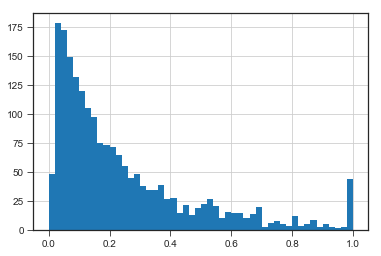

In [21]:
comm.ViolentCrimesPerPop.hist(bins=50)
# this is target variable
# it is continuous
# but looking at the histogram
# we change it to the binary classification task
# Why?
# If it was regular distribution it should lower and lower
# But above 46 there is a jump

Target variable is continous but by looking at the distribution we can turn it into classification problem high/low crime rate.

In [22]:
comm["ViolentCrimesPerPop"] = (comm.ViolentCrimesPerPop > 0.46).astype(int)

### Benchmark
Lets start with all the features in our dataset. and set the benchmark.

In [24]:
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

aucs = []
aucsT = []
for train, test in kf.split(comm.index.values):
    mod = sm.GLM.from_formula(formula="ViolentCrimesPerPop ~ "+"+".join(features), data=comm.iloc[train], family=sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict()
    preds = res.predict(comm.iloc[test])
    print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPop, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPop, preds))
    aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPop, preds))
    aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPop, predsTrain))
print(np.mean(aucsT), np.mean(aucs))

# As we can see there is some problem with overfitting

Train AUC: 0.9396480024195472 Valid AUC: 0.9207199919102033
Train AUC: 0.9411466112770723 Valid AUC: 0.8984546360917248
Train AUC: 0.9431115608987221 Valid AUC: 0.914804328041258
Train AUC: 0.9489862327909888 Valid AUC: 0.8938871473354233
Train AUC: 0.9509847786989516 Valid AUC: 0.8668145956607496
0.9447754372170565 0.8989361398078717


### Corellations
There are many variables that corelate with each other a lot.

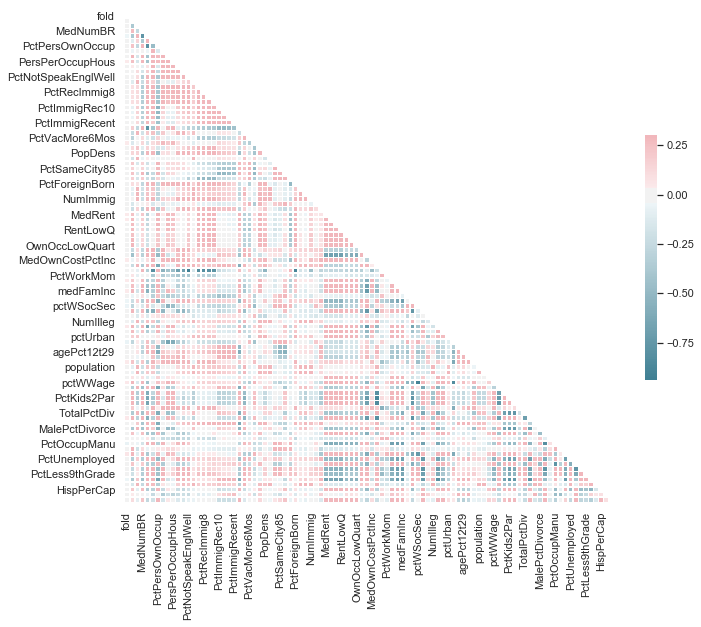

In [25]:
sns.set(style="white")
# Compute the correlation matrix
corr = comm[features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## There is a problem with correlation

Looking at the chart is very helpful to develop intuition but it is more useful to code with some code. That will show us highest spearman correlation for all variables.

In [27]:
corr = comm[features].corr(method="spearman")
for row in corr.iterrows():
    s = row[1]
    print(row[0])
    print(s[np.abs(s)>0.8])
    print(s[np.abs(s)>0.8].index.tolist())
    print("\n")
    
## We look at the very high correlation
## From time to time we can see groups with high correlation (in below output)
## There ar groups highly correlated
## For example not speaking English well highly correlated with immigrants, and highly negative with perfect speaking

fold
fold    1.0
Name: fold, dtype: float64
['fold']


PctHousOccup
PctHousOccup    1.0
Name: PctHousOccup, dtype: float64
['PctHousOccup']


HousVacant
HousVacant    1.0
Name: HousVacant, dtype: float64
['HousVacant']


MedNumBR
MedNumBR          1.000000
PctHousLess3BR   -0.849387
Name: MedNumBR, dtype: float64
['MedNumBR', 'PctHousLess3BR']


PctHousLess3BR
MedNumBR         -0.849387
PctHousLess3BR    1.000000
Name: PctHousLess3BR, dtype: float64
['MedNumBR', 'PctHousLess3BR']


PctPersDenseHous
PctPersDenseHous    1.0
Name: PctPersDenseHous, dtype: float64
['PctPersDenseHous']


PctPersOwnOccup
PctPersOwnOccup    1.000000
PctHousOwnOcc      0.977963
Name: PctPersOwnOccup, dtype: float64
['PctPersOwnOccup', 'PctHousOwnOcc']


PersPerRentOccHous
PersPerRentOccHous    1.0
Name: PersPerRentOccHous, dtype: float64
['PersPerRentOccHous']


PersPerOwnOccHous
PersPerOwnOccHous    1.000000
PersPerOccupHous     0.894069
PersPerFam           0.847186
Name: PersPerOwnOccHous, dtype: float64
['

By reviewing the groups we can choose by hand big groups of corellated variables.

In [29]:
corrGroups = [
['PersPerOwnOccHous', 'PersPerOccupHous', 'householdsize', 'PersPerFam'],
['PctNotSpeakEnglWell', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctForeignBorn', 'NumImmig', 'PctSpeakEnglOnly'],
['MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'medFamInc', 'medIncome'],
['PctHousNoPhone', 'perCapInc', 'medFamInc', 'pctWInvInc', 'medIncome', 'PctKids2Par', 'PctYoungKids2Par', 'PctPopUnderPov'],
]

## By scrolling through this lists and looking for highly correlated groups : We found 4 groups, regarding:
## - size of the households
## - immigration, people speakeng well, etc
## - price of the real estate, median rate, income of the family
## - income, but related to the number of children

## Ok, logistic regression doesnt like too many correlated - so groups
## One algorithm that likes highly correalted data from the same distribution is KNN

Now we will turn every group into one variable that will be created using k-NN. We are doing some slight leaking in here as we run it on the whole set but the effect should be minor as we use 30 neighbours.

We also update our feature list by removing now obsolete variables. We reduced the number of variables by almost 20.

In [31]:
## I will create an embedding because I will use my KNN classifier to fit and predict my target value
## But by using only features from my group
## Sou I will take those 4 variables (from first group) and make one prediction with those variables
## Then we those variables, etc
## I will use 30 neighbours -> I slightly reduce problem with overfiiting
## to do it correctly it should be done with CV
## But it is just proof of concept
## I will run this 1,2,3,4 times 
## And then I will for each group remove all those features from list
## And will add those new created features from classification from KNN

from sklearn import neighbors
n_neighbors = 30
clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=2)
for i, group in enumerate(corrGroups):
    clf.fit(comm[group].values, comm["ViolentCrimesPerPop"].values)
    comm["group_"+str(i)] = clf.predict_proba(comm[group].values)[:,0]

In [34]:
for i, group in enumerate(corrGroups):
    features.append("group_"+str(i))
    for var in group:
        try:
            features.remove(var)
        except:
            pass
print(len(features))

# We reduce number of features from 96 to 73

81


Lets see if it brought any improvemnt to our results

In [35]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

aucs = []
aucsT = []
for train, test in kf.split(comm.index.values):
    mod = sm.GLM.from_formula(formula="ViolentCrimesPerPop ~ "+"+".join(features), data=comm.iloc[train], family=sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict()
    preds = res.predict(comm.iloc[test])
    print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPop, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPop, preds))
    aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPop, preds))
    aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPop, predsTrain))
print(np.mean(aucsT), np.mean(aucs))

## Now we have much much better results
## Those results are inflated in fact that i didnt run this procedure in logistic regression
## But they are inflated only a little bit


Train AUC: 0.9527473436632037 Valid AUC: 0.9197373393801964
Train AUC: 0.9533314962489737 Valid AUC: 0.8877538684719537
Train AUC: 0.9511638767152814 Valid AUC: 0.9131451177845711
Train AUC: 0.9522879900046853 Valid AUC: 0.9210058645814821
Train AUC: 0.9425761718454961 Valid AUC: 0.9522212543554007
0.9504213756955281 0.9187726889147207


Higher AUC on validation set, lower difference between training and validation. This can be considered a success. We can also visually inspect the correlation table to see if the problem is reduced.

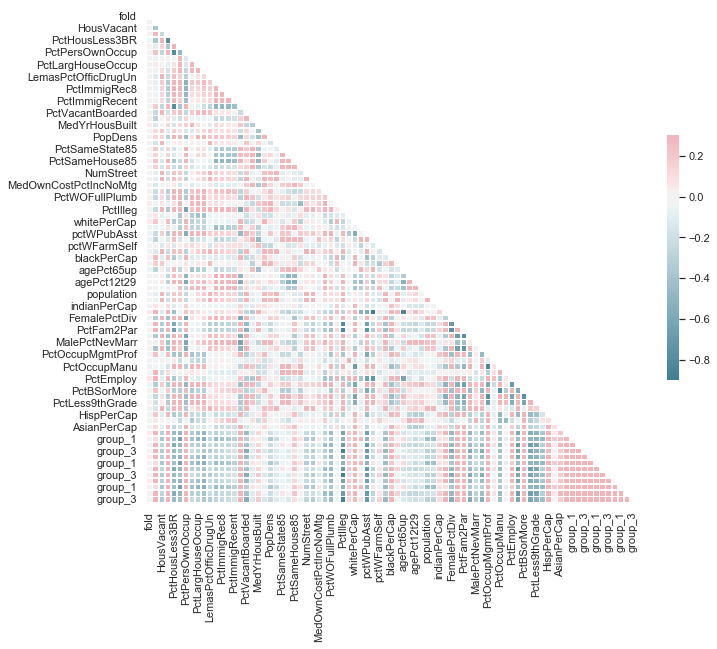

In [36]:
sns.set(style="white")
# Compute the correlation matrix
corr = comm[features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Other transformations
It may be possible to get more out of the data with transformation of independant variables. First lets try to find the most important variables to see where we can get the most improvement.

PctIlleg Seems like a good candidate.

In [37]:
from sklearn import feature_selection
mi = feature_selection.mutual_info_classif(comm[features],comm["ViolentCrimesPerPop"])
imp = list(zip(mi, features))
imp.sort(reverse=True)
imp[0:10]

[(0.20613413450033424, 'group_3'),
 (0.19919141940317475, 'group_3'),
 (0.19180019763029899, 'group_3'),
 (0.16693963246421273, 'PctIlleg'),
 (0.15377256866167044, 'PctFam2Par'),
 (0.14401354891969653, 'group_2'),
 (0.14183271202058534, 'group_0'),
 (0.14170908926397519, 'NumIlleg'),
 (0.13930463994871012, 'group_0'),
 (0.13925397585897836, 'PctTeen2Par')]

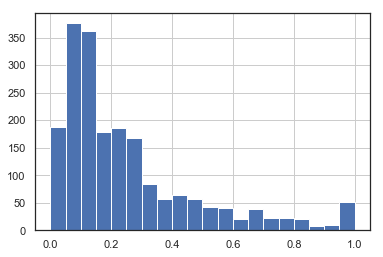

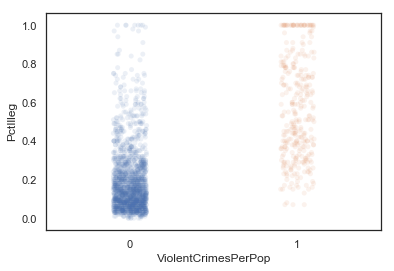

In [38]:
feat = "PctIlleg"
comm[feat].hist(bins=20)
plt.show()
import seaborn as sns
sns.stripplot(x="ViolentCrimesPerPop", y=feat, data=comm, jitter=True, alpha =0.1)
plt.show()

## whene there is a county with high probability of violent crimes or density
## i can visually tell % off illegal crimes is higher
## so maybe i can try different procedures


We can experiment with different transformations to see if it brings any improvement.

In [39]:
## maybe it will help if we take square root
## maybe to the power of two
comm2 = comm.copy()
# comm2[feat] = comm[feat].rank(pct=True)
# comm2[feat] = comm[feat]**2
comm2[feat] = comm[feat]**0.5


In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2018)

aucs = []
aucsT = []
for train, test in kf.split(comm.index.values):
    mod = sm.GLM.from_formula(formula="ViolentCrimesPerPop ~ "+"+".join(features), data=comm2.iloc[train], family=sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict()
    preds = res.predict(comm2.iloc[test])
    print("Train AUC:", roc_auc_score(comm2.iloc[train].ViolentCrimesPerPop, predsTrain), "Valid AUC:", roc_auc_score(comm2.iloc[test].ViolentCrimesPerPop, preds))
    aucs.append(roc_auc_score(comm2.iloc[test].ViolentCrimesPerPop, preds))
    aucsT.append(roc_auc_score(comm2.iloc[train].ViolentCrimesPerPop, predsTrain))
print(np.mean(aucsT), np.mean(aucs))


## Results not changing a lot

Train AUC: 0.9525050526539729 Valid AUC: 0.9162887377173092
Train AUC: 0.9507376330773426 Valid AUC: 0.9286902286902288
Train AUC: 0.9546472597477809 Valid AUC: 0.9056594860166288
Train AUC: 0.9482456491985591 Valid AUC: 0.9393608899552841
Train AUC: 0.9516038366114445 Valid AUC: 0.92372311827957
0.9515478862578199 0.9227444921318042


Our typical transformations do not seem to bring any effect for this variable.